In [71]:
import ranky as rk
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from ortools.linear_solver import pywraplp

In [72]:
M = 100
NumExpert = 3

In [73]:
rnd = np.random.RandomState(1)

In [74]:
matrix = rnd.normal(10, 1, size=(M, 3))

In [ ]:
# matrix

In [26]:
res = rk.center(matrix, method='kendalltau')

Optimization terminated successfully.


In [ ]:
#array([10.43945238,  8.07012314, 10.47893234,  8.30329057, 10.67053202,
#        7.97961162,  8.97634793, 11.39064463,  9.28250048, 10.5212298 ])

In [ ]:
res

In [ ]:
r = np.arange(M)

In [ ]:
np.argsort(res)

In [ ]:
np.argsort(matrix[:,0])

In [ ]:
np.argsort(matrix[:,1])

In [ ]:
np.argsort(matrix[:,2])

In [27]:
a = np.zeros((NumExpert,M,M))
for k in range(NumExpert):
    for i in range(M):
        for j in range(M):
            if matrix[i,k] < matrix[j,k]:
                a[k,i,j] = 0
            else:
                a[k,i,j] = 1

In [28]:
a

array([[[1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 0., 1., 1., 1., 0., 0., 0., 1.],
        [0., 1., 0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 1., 1., 0., 0., 1.],
        [0., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.]],

       [[1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
        [1., 0., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 1., 1.]

In [75]:
w = np.zeros((M,M))
for k in range(NumExpert):
    for i in range(M):
        for j in range(M):
            if matrix[j,k] >= matrix[i,k] and i != j:
                w[i,j] += 1
w

array([[0., 1., 2., ..., 1., 2., 1.],
       [2., 0., 2., ..., 2., 2., 2.],
       [1., 1., 0., ..., 1., 2., 1.],
       ...,
       [2., 1., 2., ..., 0., 1., 2.],
       [1., 1., 1., ..., 2., 0., 2.],
       [2., 1., 2., ..., 1., 1., 0.]])

In [ ]:
solver = pywraplp.Solver.CreateSolver('SCIP')
if not solver:
    print('Error!')

In [ ]:
x = {}
for i in range(M):
    for j in range(M):
        if i != j:
            x[(i,j)] = solver.BoolVar(f"x[{i},{j}]")

In [ ]:
#ym = {}
#yp = {}
#for k in range(NumExpert):
#    for i in range(M):
#        for j in range(M):
#            if i != j:
#                ym[(k,i,j)] = solver.BoolVar(f"ym[{k},{i},{j}]")
#                yp[(k,i,j)] = solver.BoolVar(f"yp[{k},{i},{j}]")
#                solver.Add(yp[(k,i,j)] - ym[(k,i,j)] + x[(i,j)] == a[k,i,j])

In [ ]:
for k in range(M):
    for i in range(M):
        for j in range(M):
            if i != j and j != k and i != k:
                #solver.Add(x[(i,j)] + x[(j,k)] + x[(k,i)] <= 2)
                solver.Add(x[(i,j)] + x[(j,k)] + x[(k,i)] >= 1)

In [ ]:
for i in range(M):
    for j in range(M):
        if i != j:
            solver.Add(x[(i,j)] + x[(j,i)] == 1)

In [ ]:
print('Number of constraints =', solver.NumConstraints())

In [ ]:
#solver.Minimize(solver.Sum(yp[(k,i,j)] + ym[(k,i,j)] for k in range(NumExpert) for i in range(M) for j in range(M) if i != j))
solver.Minimize(solver.Sum(w[i,j] * x[(i,j)] for i in range(M) for j in range(M) if i != j))

In [ ]:
status = solver.Solve()

In [ ]:
if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    #for ij in x:
    #    print(x[ij].name(), ' = ', x[ij].solution_value())
    print()
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())
else:
    print('The problem does not have an optimal solution.')

In [ ]:
mykm = np.array([[ int(x[(i,j)].solution_value()) if i != j else 1 for j in range(M)] for i in range(M)])
# mykm

In [36]:
other_km = np.array([[int(res[i]>=res[j]) for j in range(M)] for i in range(M)]) 
other_km

array([[1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1]])

In [42]:
np.sum(np.abs(mykm - other_km))

0

In [43]:
np.sum(np.abs(mykm - a[0]))+np.sum(np.abs(mykm - a[1]))+np.sum(np.abs(mykm - a[2]))

88.0

In [44]:
np.sum(np.abs(other_km - a[0]))+np.sum(np.abs(other_km - a[1]))+np.sum(np.abs(other_km - a[2]))

88.0

In [32]:
for i in range(M):
    mykm[i,i] = 0

In [33]:
G = nx.from_numpy_array(mykm, create_using = nx.DiGraph())

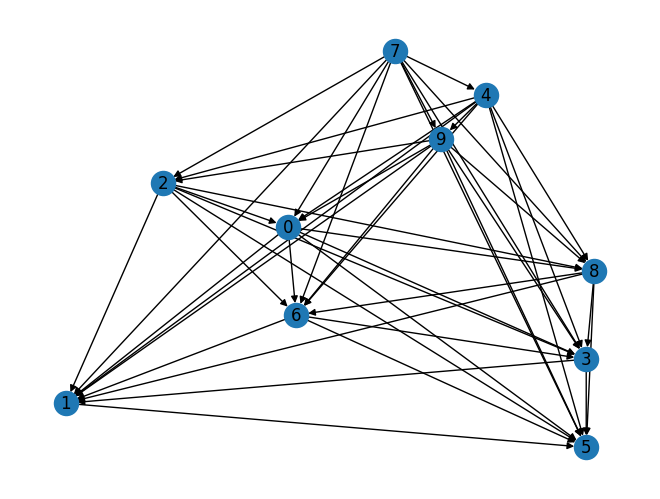

In [34]:
sg = G.subgraph([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 29])
pos = nx.nx_agraph.graphviz_layout(sg, prog="dot")
nx.draw(sg,with_labels=True, 
        pos = pos)

In [35]:
nx.is_directed_acyclic_graph(G)

True

In [ ]:
#nx.find_cycle(G)

In [ ]:
mykm

In [ ]:
for i in range(M):
    for j in range(M):
        for k in range(M):
            if i != j and j != k and i != k:
                # print(mykm[i,j] + mykm[j,k] + mykm[k,i]) 
                pass

In [ ]:
for i in range(M):
    other_km[i,i] = 0
G = nx.from_numpy_array(other_km, create_using = nx.DiGraph()) 
nx.is_directed_acyclic_graph(G)

In [ ]:
for i in range(M):
    for j in range(M):
        for k in range(M):
            if i != j and j != k and i != k:
                pass # print(other_km[i,j] + other_km[j,k] + other_km[k,i])  

In [2]:
from pyscipopt import Model, quicksum

In [76]:
model = Model() 

In [77]:
x = {}
for i in range(M):
    for j in range(M):
        if i != j:
            x[(i,j)] = model.addVar(f"x[{i},{j}]", vtype = 'B')

In [78]:
for k in range(M):
    for i in range(M):
        for j in range(M):
            if i != j and j != k and i != k:
                model.addCons(x[(i,j)] + x[(j,k)] + x[(k,i)] >= 1)

In [79]:
for i in range(M):
    for j in range(M):
        if i != j:
            model.addCons(x[(i,j)] + x[(j,i)] == 1)

In [80]:
model.setObjective(quicksum(w[i,j] * x[(i,j)] for i in range(M) for j in range(M) if i != j), "minimize")
model.optimize()
sol = model.getBestSol()

presolving:
(round 1, fast)       4950 del vars, 9900 del conss, 0 add conss, 0 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (2.3s) running MILP presolver
   (3.5s) MILP presolver (2 rounds): 0 aggregations, 0 fixings, 0 bound changes
(round 2, medium)     4950 del vars, 980100 del conss, 161700 add conss, 0 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (3.8s) probing: 51/4950 (1.0%) - 0 fixings, 0 aggregations, 0 implications, 0 bound changes
   (3.8s) probing aborted: 50/50 successive totally useless probings
   Deactivated symmetry handling methods, since SCIP was built without symmetry detector (SYM=none).
presolving (3 rounds: 3 fast, 2 medium, 1 exhaustive):
 4950 deleted vars, 980100 deleted constraints, 161700 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 4950 variables (4950 bin, 0 int, 0 impl, 0 cont) and 161700 constraints
 161

In [82]:
model.getObjVal()

4429.0

In [81]:
sol[x[(0,1)]]

1.0

In [69]:
mykm = np.array([[ int(sol[x[(i,j)]]) if i != j else 1 for j in range(M)] for i in range(M)])


In [70]:
mykm

array([[1, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1]])